# 机器学习练习1-线性回归
参考自吴恩达老师的[公开课项目](https://github.com/fengdu78/Coursera-ML-AndrewNg-Notes)

## 单变量线型回归

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(filepath_or_buffer='ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [39]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


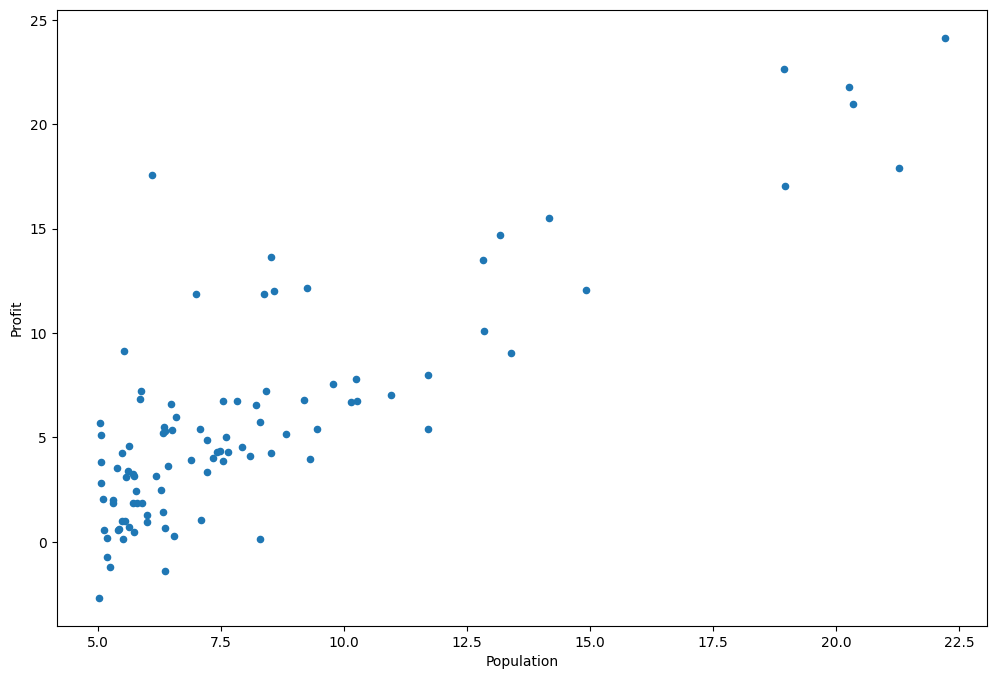

In [40]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 以下代码示例中实现的方程在“练习”文件夹中的“ex1.pdf”中有详细说明。

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}x={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}} $$

In [41]:
def cost_function(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [42]:
data.insert(0, 'Ones', 1)

In [43]:
# set X (training data) and y (target variable)
cols = data.shape[1]
# X是所有行，去掉最后一列
X = data.iloc[:, 0: cols - 1]
# y是所有行，最后一列
y = data.iloc[:, cols - 1: cols]
X.head(), y.head()

(   Ones  Population
 0     1      6.1101
 1     1      5.5277
 2     1      8.5186
 3     1      7.0032
 4     1      5.8598,
     Profit
 0  17.5920
 1   9.1302
 2  13.6620
 3  11.8540
 4   6.8233)

In [44]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))
X.shape, theta.shape, y.shape
cost_function(X, y, theta)

32.072733877455676